<a href="https://colab.research.google.com/github/samuel1sm/Project_MPCE/blob/main/TestesFaceClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Preparação do ambiente*


In [ ]:
pip install face_recognition

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
 import shutil
 shutil.rmtree('/imgs', ignore_errors=True)

!ln -s "/content/gdrive/My Drive/Datasets/ProjetoMPCE/TestDataset" imgs
os.mkdir("dataset")

In [ ]:
data7s = os.listdir("imgs/")
data7s

['SortedImages.zip', 'data7.zip']

In [ ]:
from zipfile import ZipFile

In [ ]:
for i in data7s:
  with ZipFile(f"imgs/{i}", 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall("dataset/")

In [ ]:
import glob 
images_path = glob.glob("dataset/*")

In [ ]:
images_path


['dataset/42.jpg',
 'dataset/00000103.jpg',
 'dataset/00000096.jpg',
 'dataset/85.jpg',
 'dataset/00000014.jpg',
 'dataset/00000016.jpg',
 'dataset/30.jpg',
 'dataset/00000109.jpg',
 'dataset/77.jpg',
 'dataset/4.jpg',
 'dataset/0.jpg',
 'dataset/00000033.jpg',
 'dataset/76.jpg',
 'dataset/32.jpg',
 'dataset/21.jpg',
 'dataset/00000113.jpg',
 'dataset/00000035.jpg',
 'dataset/00000082.jpg',
 'dataset/45.jpg',
 'dataset/00000101.jpg',
 'dataset/00000030.jpg',
 'dataset/00000060.jpg',
 'dataset/61.jpg',
 'dataset/00000068.jpg',
 'dataset/27.jpg',
 'dataset/18.jpg',
 'dataset/79.jpg',
 'dataset/00000102.jpg',
 'dataset/00000027.jpg',
 'dataset/00000061.jpg',
 'dataset/38.jpg',
 'dataset/71.jpg',
 'dataset/00000126.jpg',
 'dataset/00000120.jpg',
 'dataset/17.jpg',
 'dataset/00000076.jpg',
 'dataset/00000124.jpg',
 'dataset/00000072.jpg',
 'dataset/55.jpg',
 'dataset/78.jpg',
 'dataset/23.jpg',
 'dataset/00000040.jpg',
 'dataset/88.jpg',
 'dataset/00000117.jpg',
 'dataset/00000128.jpg',
 'd


# *Codificando faces*




In [ ]:
pip install face_recognition

     |████████████████████████████████| 100.2MB 115kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=80949707fdbb17c35659eb82561742b4413253ad4dd143d205096bdae0c52c10
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
from imutils import paths
import face_recognition
import argparse
import pickle
import cv2
import os

In [ ]:
print("[INFO] quantifying faces...")
imagePaths = images_path
detection_method = "cnn"
encondings_path = "encodings/"
data = []

if not os.path.exists(encondings_path):
  os.mkdir(encondings_path)

[INFO] quantifying faces...


In [ ]:
for (i, imagePath) in enumerate(imagePaths):
	# load the input image and convert it from RGB (OpenCV ordering)
	# to dlib ordering (RGB)
  print("[INFO] processing image {}/{}".format(i + 1,
    len(imagePaths)))
  print(imagePath)
  image = cv2.imread(imagePath)
  rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  boxes = face_recognition.face_locations(rgb,  model=detection_method)

  encodings = face_recognition.face_encodings(rgb, boxes)
  # build a dictionary of the image path, bounding box location,
  # and facial encodings for the current image
  d = [{"imagePath": imagePath, "loc": box, "encoding": enc}
    for (box, enc) in zip(boxes, encodings)]
  data.extend(d)

[INFO] processing image 1/220
dataset/42.jpg
[INFO] processing image 2/220
dataset/00000103.jpg
[INFO] processing image 3/220
dataset/00000096.jpg
[INFO] processing image 4/220
dataset/85.jpg
[INFO] processing image 5/220
dataset/00000014.jpg
[INFO] processing image 6/220
dataset/00000016.jpg
[INFO] processing image 7/220
dataset/30.jpg
[INFO] processing image 8/220
dataset/00000109.jpg
[INFO] processing image 9/220
dataset/77.jpg
[INFO] processing image 10/220
dataset/4.jpg
[INFO] processing image 11/220
dataset/0.jpg
[INFO] processing image 12/220
dataset/00000033.jpg
[INFO] processing image 13/220
dataset/76.jpg
[INFO] processing image 14/220
dataset/32.jpg
[INFO] processing image 15/220
dataset/21.jpg
[INFO] processing image 16/220
dataset/00000113.jpg
[INFO] processing image 17/220
dataset/00000035.jpg
[INFO] processing image 18/220
dataset/00000082.jpg
[INFO] processing image 19/220
dataset/45.jpg
[INFO] processing image 20/220
dataset/00000101.jpg
[INFO] processing image 21/220


In [ ]:
print("[INFO] serializing encodings...")
f = open(f"{encondings_path}/encodings.pickle", "wb")
f.write(pickle.dumps(data))
f.close()

[INFO] serializing encodings...


# *Clusterizando faces*


In [ ]:
from sklearn.cluster import DBSCAN
from imutils import build_montages
import numpy as np
import argparse
import pickle
import cv2
import pandas as pd

In [ ]:
imagePaths = images_path
jobs = -1
detection_method = "cnn"
encondings_path = "encodings/encodings.pickle"

In [ ]:
print("[INFO] loading encodings...")
data = pickle.loads(open(encondings_path, "rb").read())
df = pd.DataFrame(data)
encodings =df["encoding"].values.tolist()

[INFO] loading encodings...


In [ ]:
print("[INFO] clustering...")
clt = DBSCAN(metric="euclidean", n_jobs=-1, min_samples = 3, )
clt.fit(encodings)
# determine the total number of unique faces found in the dataset
labelIDs = np.unique(clt.labels_)
numUniqueFaces = len(np.where(labelIDs > -1)[0])
print("[INFO] # unique faces: {}".format(numUniqueFaces))

[INFO] clustering...
[INFO] # unique faces: 9


In [ ]:
df["cluster"] = clt.labels_

# *Plotando Imagens*


In [ ]:
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
filtro = df[df["imagePath"] == "dataset/65.jpg"]

In [ ]:
filtro = df[df["cluster"] == 5].copy()

In [ ]:
filtro.reset_index(inplace=True)

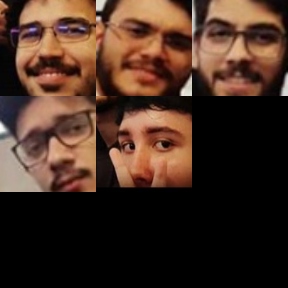

In [ ]:
faces = []
for i,line in filtro.iterrows():
    image = cv2.imread(line["imagePath"])
    (top, right, bottom, left) = line["loc"]
    face = image[top:bottom, left:right]
    face = cv2.resize(face, (96, 96))
    faces.append(face)
  
montage = build_montages(faces, (96, 96), (3, 3))[0]
cv2_imshow(montage)


dataset/76.jpg
dataset/79.jpg
dataset/78.jpg
dataset/80.jpg
dataset/29.jpg
dataset/68.jpg
dataset/63.jpg
dataset/74.jpg
dataset/87.jpg
dataset/82.jpg
dataset/75.jpg
dataset/64.jpg
dataset/81.jpg
dataset/65.jpg


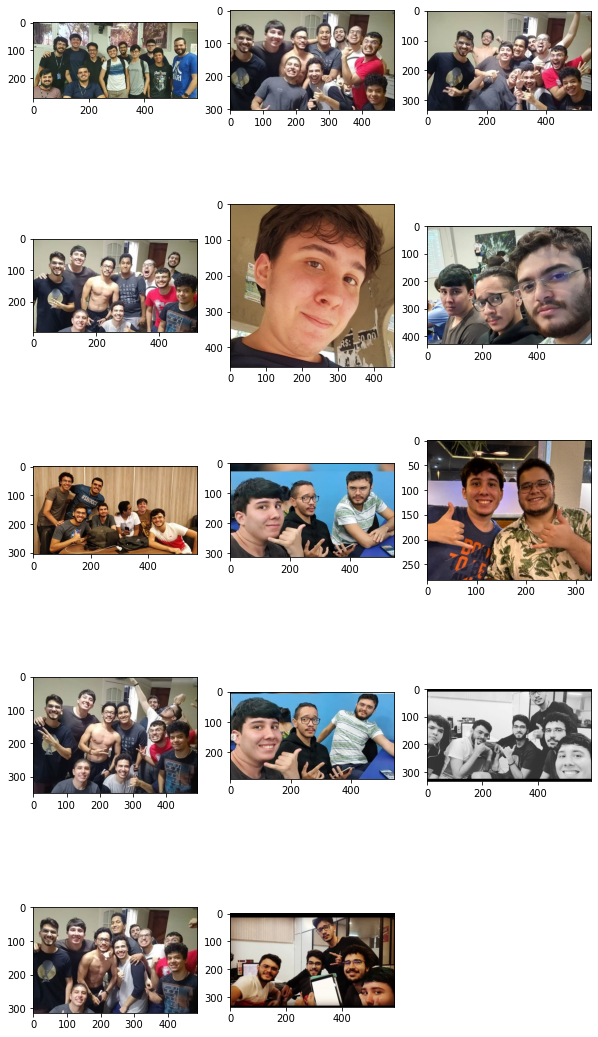

In [ ]:
plt.figure(figsize=(10,20))
columns = 3
for i,line in filtro.iterrows():
      
    plt.subplot(((int(len(filtro)) +1)/columns),columns,i+1)
    print(line["imagePath"])
    img = cv2.imread(line["imagePath"])
    # cv2_imshow(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
plt.show()

[INFO] faces for face ID: -1


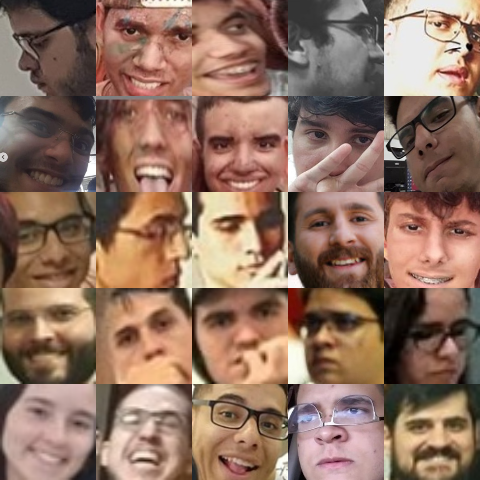

[INFO] faces for face ID: 0


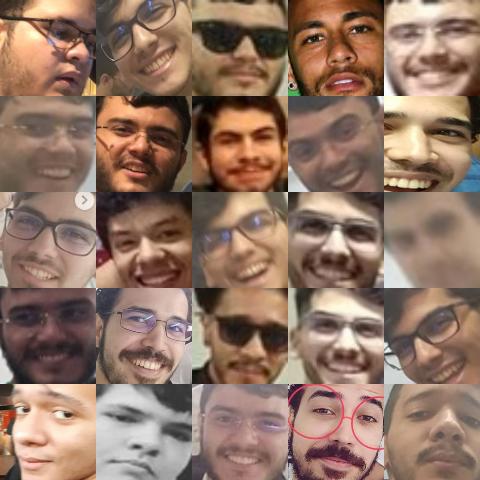

[INFO] faces for face ID: 1


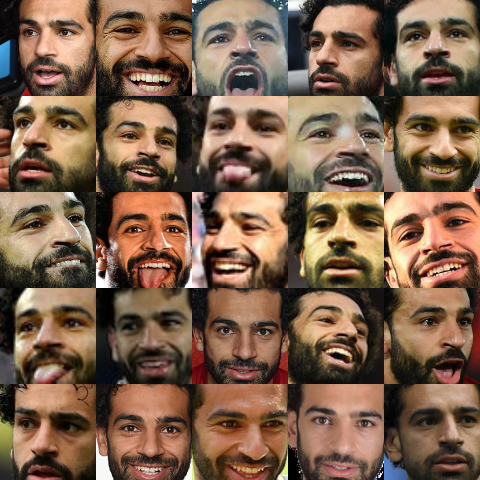

[INFO] faces for face ID: 2


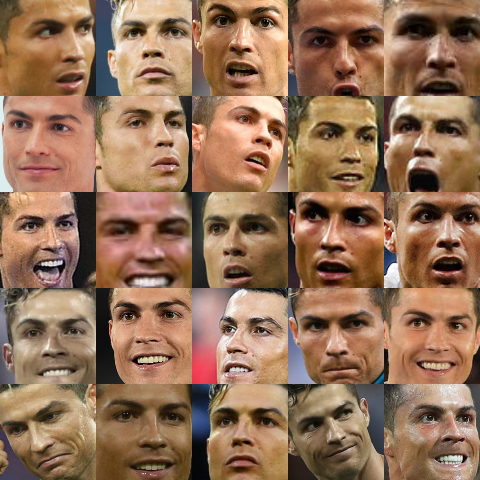

[INFO] faces for face ID: 3


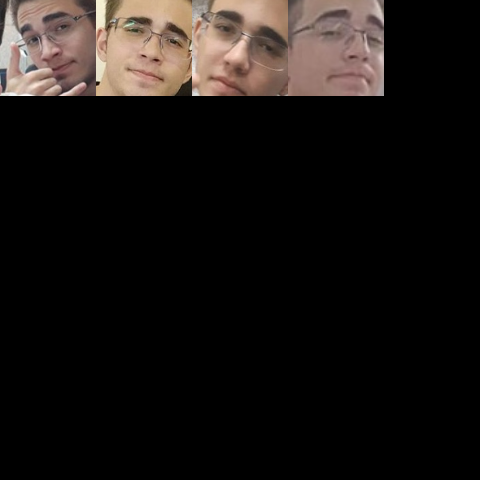

[INFO] faces for face ID: 4


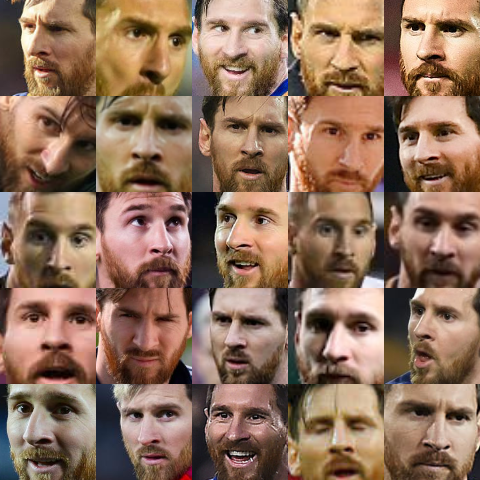

[INFO] faces for face ID: 5


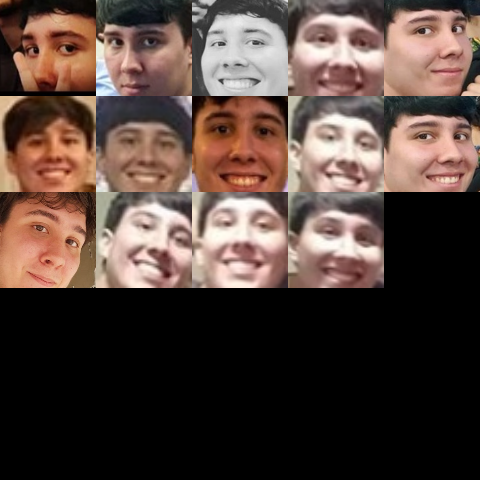

[INFO] faces for face ID: 6


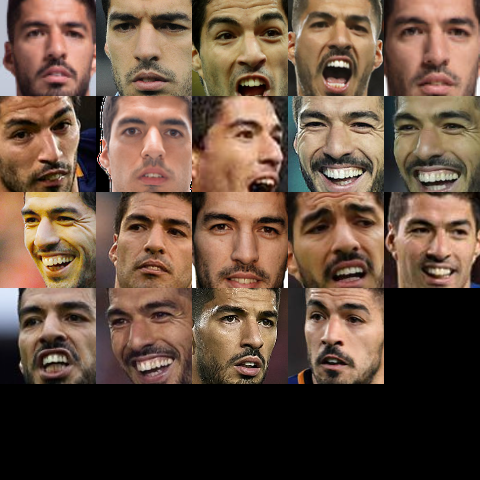

[INFO] faces for face ID: 7


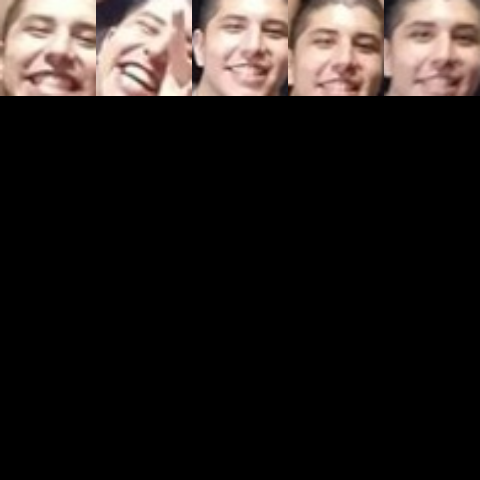

[INFO] faces for face ID: 8


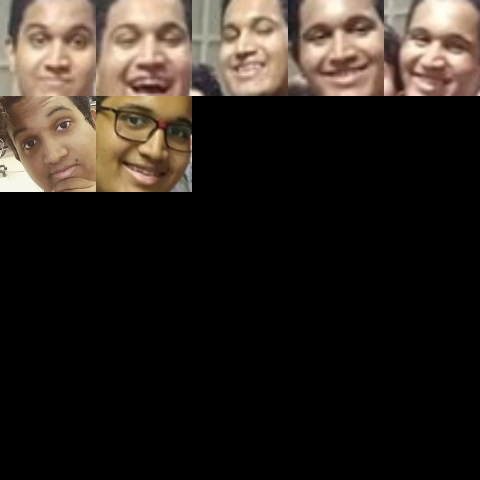

In [ ]:
for labelID in labelIDs:
  print("[INFO] faces for face ID: {}".format(labelID))
  idxs = df[df["cluster"] == labelID]
  idx = idxs.sample(min(25, len(idxs)))

  faces = []
  for i,line in idx.iterrows():
    image = cv2.imread(line["imagePath"])
    (top, right, bottom, left) = line["loc"]
    face = image[top:bottom, left:right]
    face = cv2.resize(face, (96, 96))
    faces.append(face)

  montage = build_montages(faces, (96, 96), (5, 5))[0]

	# show the output montage
  title = "Face ID #{}".format(labelID)
  title = "Unknown Faces" if labelID == -1 else title
  cv2_imshow(montage)
